In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.descent_methods import *
from Code.utilities import train_test_split, plot_test_results

# analytic gradient methods
from Code.utilities import OLS_train_autograd, MSELoss_method

# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling, plot_surface, scale_feature_matrix

import numpy as np
import jax.numpy as jnp

In [2]:
# Initialise beta
num_features = 10
beta0 = {"b" : np.random.random(num_features)}

# Start with small values
beta0 = {"b" : np.random.random(num_features)*0.1}

# beta0 = {"b" : 0*np.random.random(num_features)}


# Sample points and split in train and test
num_points = 200
split=0.5
data = r2_sampling(num_points)
x, y, z = data["x"], data["y"], data["z"]
X = feature_matrix_2d(x, y, num_features)
X, means, var = scale_feature_matrix(X)
X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, split)

### TODO: dette er en quickfix...
y_train, y_test = np.squeeze(y_train), np.squeeze(y_test)

# Number of of minibatch when using batch size 10
m = int(len(y_train) / 10) 
epochs = 20

# Define the polynomial fit model
def model(beta, X):
    # print(beta)
    return jnp.dot(X, beta["b"])

loss_func = MSELoss_method(model)
loss_grad = OLS_train_autograd(model)

### Plain GD

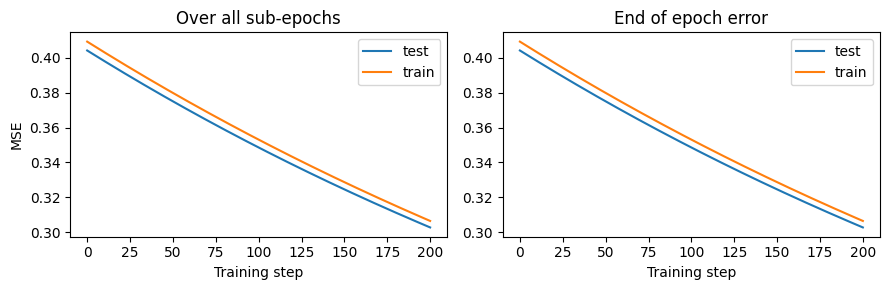

In [3]:
result_GD = GD(X_train, y_train, X_test, y_test, grad_method=loss_grad, n_epochs=epochs*10, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_GD["test_loss_list"], result_GD["train_loss_list"], 1)

### Stochastic

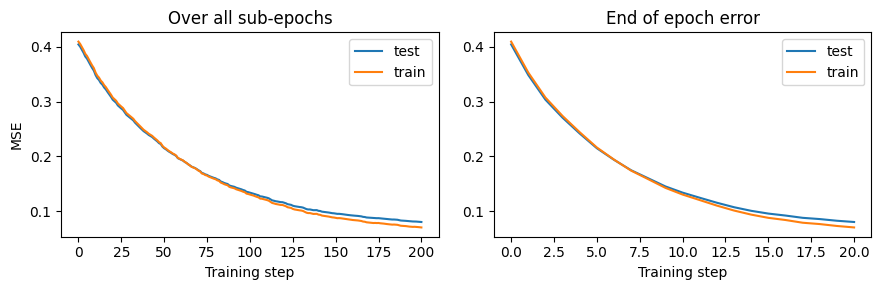

In [4]:
result_SGD = SGD(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_SGD["test_loss_list"], result_SGD["train_loss_list"], m)

### Adagrad

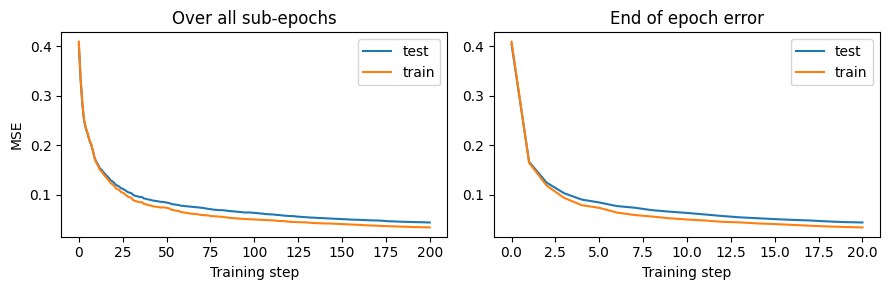

In [5]:
result_adagrad = SGD_adagrad(X_train, y_train, X_test, y_test, grad_method=loss_grad, n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_adagrad["test_loss_list"], result_adagrad["train_loss_list"], m)

### RMS prop

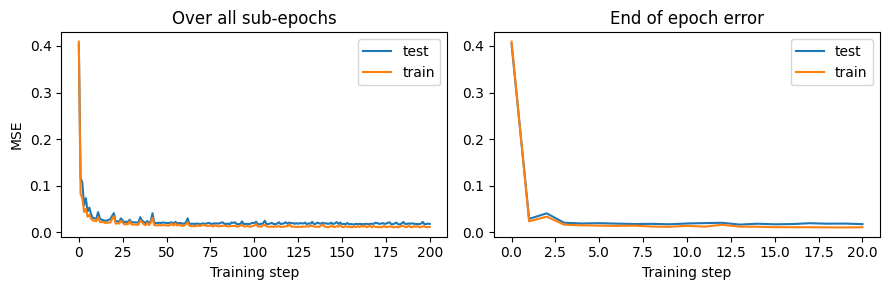

In [6]:
result_RMS_prop = SGD_RMS_prop(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_RMS_prop["test_loss_list"], result_RMS_prop["train_loss_list"], m)

### Adam

0.017419131 0.012114477


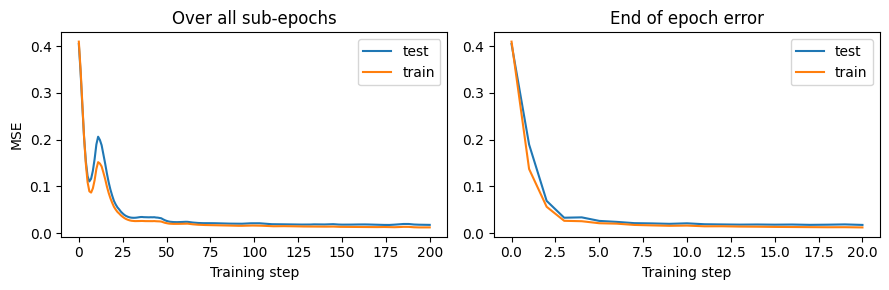

In [8]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)

print(min(result_adam["test_loss_list"]), min(result_adam["train_loss_list"]))

plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)